# Data Wangling for Loan Datasets
Perform data wrangling for 2018 loan data collected from LendingClub. The datasets include four csv files containing loan data for each quarter in 2018. The datasets can be founded [here](https://github.com/nphan20181/Loan-Default-Prediction/tree/master/data).

Step-by-step data wrangling:
- [Step 1: Import Data](#Step-1:-Import-Data)
- [Step 2: Inspect Data](#Step-2:-Inspect-Data)
- [Step 3: Change Data Type](#Step-3:-Change-Data-Type)
- [Step 4: Handle Missing Values](#Step-4:-Handle-Missing-Values)
- [Step 5: Handle Outliers](#Step-5:-Handle-Outliers)
- [Step 6: Export Data](#Step-6:-Export-Data)

## Step 1: Import Data

In [1]:
import glob

csv_file = glob.glob('data/*.csv')    # get a list of csv files to be read
csv_file

['data\\LoanStats_2018Q1.csv',
 'data\\LoanStats_2018Q2.csv',
 'data\\LoanStats_2018Q3.csv',
 'data\\LoanStats_2018Q4.csv']

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 150)

list_data = []
for filename in csv_file:
    # read csv file into data frame, skip first row which contains general note
    data = pd.read_csv(filename, skiprows=[0], low_memory=False)
    # drop columns that contain no values
    data.drop(axis=1, columns=['id', 'member_id', 'url', 'desc'], inplace=True)
    # drop last 2 rows that contain the total amount funded in policy code 1 and 2
    data.drop(axis=0, index=data.iloc[-2:,:].index, inplace=True)
    list_data.append(data)

# combine into one data frame and drop column 'index'
df = pd.concat(list_data).reset_index().drop(axis=1, columns=['index'])

## Step 2: Inspect Data
- [Numerical Columns](#Numerical-Columns)
- [Non-numerical Columns](#Non-numerical-Columns)
- [Duplicates](#Duplicates)

In [3]:
# show number of rows and columns
df.shape

(495242, 140)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495242 entries, 0 to 495241
Columns: 140 entries, loan_amnt to settlement_term
dtypes: float64(104), object(36)
memory usage: 529.0+ MB


### Numerical Columns

In [5]:
num_cols_df = df.select_dtypes(include=["number"])     # numerical columns
num_cols_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record',
       ...
       'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=104)

In [6]:
num_cols_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
0,10000.0,10000.0,10000.0,225.54,80000.0,7.59,0.0,1.0,27.0,NaN,17.0,0.0,10710.0,23.0,8054.53,8054.53,3369.09,3369.09,1945.47,1423.62,0.0,0.0,0.0,225.54,0.0,27.0,1.0,NaN,NaN,0.0,0.0,299196.0,1.0,0.0,0.0,1.0,18.0,0.0,NaN,6.0,12.0,1785.0,38.0,28400.0,2.0,0.0,4.0,13.0,17600.0,4193.0,66.5,0.0,0.0,133.0,137.0,4.0,4.0,2.0,4.0,27.0,4.0,27.0,2.0,10.0,14.0,10.0,11.0,3.0,16.0,18.0,14.0,17.0,0.0,0.0,0.0,6.0,91.3,40.0,0.0,0.0,388400.0,10710.0,12500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11200.0,11200.0,11200.0,367.82,44000.0,43.97,1.0,2.0,6.0,NaN,8.0,0.0,1526.0,14.0,9752.03,9752.03,5478.98,5478.98,1447.97,4031.01,0.0,0.0,0.0,367.82,0.0,70.0,1.0,81000.0,31.94,0.0,0.0,67173.0,1.0,4.0,1.0,4.0,8.0,65647.0,89.0,1.0,1.0,1011.0,84.0,6200.0,8.0,1.0,10.0,5.0,8397.0,632.0,66.7,0.0,0.0,124.0,128.0,5.0,5.0,0.0,34.0,35.0,0.0,35.0,1.0,2.0,3.0,2.0,3.0,8.0,4.0,6.0,3.0,8.0,0.0,0.0,0.0,2.0,71.4,0.0,0.0,0.0,80367.0,67173.0,1900.0,74167.0,7101.0,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6500.0,6500.0,6500.0,197.95,50000.0,8.66,0.0,0.0,58.0,NaN,7.0,0.0,7871.0,16.0,3756.50,3756.50,3153.97,3153.97,2743.50,410.47,0.0,0.0,0.0,197.95,0.0,58.0,1.0,NaN,NaN,0.0,370.0,243513.0,0.0,1.0,0.0,0.0,32.0,794.0,12.0,0.0,1.0,5467.0,19.0,39000.0,0.0,0.0,0.0,2.0,34788.0,31129.0,20.2,0.0,0.0,158.0,174.0,21.0,21.0,2.0,21.0,NaN,NaN,NaN,1.0,3.0,3.0,5.0,11.0,2.0,5.0,12.0,3.0,7.0,0.0,0.0,0.0,0.0,93.8,20.0,0.0,0.0,289008.0,8665.0,39000.0,6500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25000.0,25000.0,25000.0,688.35,65000.0,12.89,1.0,1.0,22.0,NaN,7.0,0.0,8657.0,16.0,21019.97,21019.97,10264.56,10264.56,3980.03,6284.53,0.0,0.0,0.0,688.35,0.0,23.0,1.0,NaN,NaN,0.0,0.0,74795.0,0.0,2.0,0.0,2.0,16.0,8382.0,82.0,0.0,0.0,3237.0,90.0,8800.0,4.0,3.0,3.0,2.0,10685.0,63.0,98.1,0.0,0.0,69.0,126.0,72.0,16.0,2.0,126.0,NaN,0.0,22.0,2.0,1.0,3.0,1.0,1.0,4.0,3.0,9.0,3.0,7.0,0.0,0.0,1.0,0.0,75.0,100.0,0.0,0.0,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6000.0,6000.0,6000.0,194.77,46000.0,8.92,0.0,0.0,NaN,NaN,11.0,0.0,5566.0,12.0,3334.21,3334.21,3304.13,3304.13,2665.79,638.34,0.0,0.0,0.0,194.77,0.0,NaN,1.0,NaN,NaN,0.0,0.

In [7]:
num_cols_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,495242.000000,495242.000000,495242.000000,495242.000000,4.952420e+05,494110.000000,495242.000000,495242.000000,218590.000000,62984.000000,495242.000000,495242.000000,4.952420e+05,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.00000,114833.000000,495242.0,6.898500e+04,68985.000000,495242.000000,4.952420e+05,4.952420e+05,495242.000000,495242.000000,495242.000000,495242.000000,476832.000000,4.952420e+05,414418.000000,495242.000000,495242.000000,4.952420e+05,495113.000000,4.952420e+05,495242.000000,495242.000000,495242.000000,495242.000000,495202.000000,488654.000000,488439.000000,495242.000000,495242.000000,476832.000000,495242.000000,495242.000000,495242.000000,495242.000000,489044.000000,98110.000000,433937.000000,142690.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,482838.0,495242.000000,495242.000000,495242.000000,495240.000000,488646.000000,495242.000000,495242.000000,4.952420e+05,4.952420e+05,4.952420e+05,4.952420e+05,6.898500e+04,68985.000000,68985.000000,68985.000000,67788.000000,68985.000000,68985.000000,68985.000000,68985.000000,22377.000000,807.0,807.000000,807.0,807.000000,644.000000,807.000000,807.000000,1323.000000,1323.000000,1323.000000
mean,16025.020394,16025.020394,16021.669277,466.608863,8.009399e+04,19.668887,0.229252,0.442192,36.889771,83.338689,11.491554,0.134514,1.627083e+04,22.624151,10052.778169,10050.925371,7092.265120,7090.557323,5443.572847,1621.717003,0.838209,26.137063,4.639406,2169.116664,0.01768,46.319281,1.0,1.283419e+05,19.357812,0.000052,2.143619e+02,1.439598e+05,0.898078,2.700815,0.672936,1.526753,21.100450,3.532369e+04,68.003902,1.228062,2.623687,5.862635e+03,54.087778,3.834538e+04,1.086802,1.484854,1.937368,4.426622,13709.348688,15057.282179,49.867127,0.006823,1.792829,122.954602,174.638102,15.131693,8.718534,1.336308,25.552897,40.467170,7.488555,37.753115,0.467858,3.614485,5.361825,4.840203,7.092944,8.169146,8.163348,12.918500,5.324668,11.470647,0.0,0.000046,0.059932,2.030478,94.580900,32.891971,0.123489,0.010918,1.849417e+05,5.192192e+04,2.667946e+04,4.568810e+04,3.475705e+04,0.607

### Non-numerical Columns

In [8]:
non_num_cols = df.select_dtypes(exclude=["number"])    # non-numerical columns
non_num_cols.columns 

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [9]:
non_num_cols.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,60 months,12.61%,C,C1,Supervisor,4 years,MORTGAGE,Source Verified,Mar-2018,Current,n,home_improvement,Home improvement,306xx,GA,Oct-2006,37.7%,w,Jul-2019,Jul-2019,Jul-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1,60 months,30.79%,G,G1,Client services,< 1 year,RENT,Not Verified,Mar-2018,Current,n,medical,Medical expenses,030xx,NH,Jul-2007,24.6%,w,Jul-2019,Jul-2019,Jul-2019,Joint App,Not Verified,Feb-2005,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
2,36 months,6.07%,A,A2,dental assistant,10+ years,MORTGAGE,Not Verified,Mar-2018,Current,n,debt_consolidation,Debt consolidation,970xx,OR,Sep-2003,20.2%,w,Jul-2019,Aug-2019,Jul-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,60 months,21.85%,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,Source Verified,Mar-2018,Current,n,debt_consolidation,Debt consolidation,361xx,AL,Mar-1995,98.4%,w,Jul-2019,Jul-2019,Jul-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,36 months,10.41%,B,B3,Dental Hygienist,1 year,RENT,Not Verified,Mar-2018,Current,n,credit_card,Credit card refinancing,156xx,PA,May-2010,29.6%,w,Jul-2019,Jul-2019,Jul-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [10]:
non_num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495242 entries, 0 to 495241
Data columns (total 36 columns):
term                         495242 non-null object
int_rate                     495242 non-null object
grade                        495242 non-null object
sub_grade                    495242 non-null object
emp_title                    440583 non-null object
emp_length                   453255 non-null object
home_ownership               495242 non-null object
verification_status          495242 non-null object
issue_d                      495242 non-null object
loan_status                  495242 non-null object
pymnt_plan                   495242 non-null object
purpose                      495242 non-null object
title                        495242 non-null object
zip_code                     495242 non-null object
addr_state                   495242 non-null object
earliest_cr_line             495242 non-null object
revol_util                   494650 non-null object
initi

### Duplicates
Check for duplicates.

In [11]:
duplicates = df[df.duplicated()]    # check for duplicates
duplicates

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


## Step 3: Change Data Type

#### int_rate
- Change field's type from object to float
- Show ratio instead of percentage

In [12]:
df['int_rate'].head()

0     12.61%
1     30.79%
2      6.07%
3     21.85%
4     10.41%
Name: int_rate, dtype: object

In [13]:
# convert int_rate from percentage to ratio and from object to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%'))/100)

In [14]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000.0,10000.0,10000.0,60 months,0.1261,225.54,C,C1,Supervisor,4 years,MORTGAGE,80000.0,Source Verified,Mar-2018,Current,n,home_improvement,Home improvement,306xx,GA,7.59,0.0,Oct-2006,1.0,27.0,NaN,17.0,0.0,10710.0,37.7%,23.0,w,8054.53,8054.53,3369.09,3369.09,1945.47,1423.62,0.0,0.0,0.0,Jul-2019,225.54,Jul-2019,Jul-2019,0.0,27.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,299196.0,1.0,0.0,0.0,1.0,18.0,0.0,NaN,6.0,12.0,1785.0,38.0,28400.0,2.0,0.0,4.0,13.0,17600.0,4193.0,66.5,0.0,0.0,133.0,137.0,4.0,4.0,2.0,4.0,27.0,4.0,27.0,2.0,10.0,14.0,10.0,11.0,3.0,16.0,18.0,14.0,17.0,0.0,0.0,0.0,6.0,91.3,40.0,0.0,0.0,388400.0,10710.0,12500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,11200.0,11200.0,11200.0,60 months,0.3079,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,Mar-2018,Current,n,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,2.0,6.0,NaN,8.0,0.0,1526.0,24.6%,14.0,w,9752.03,9752.03,5478.98,5478.98,1447.97,4031.01,0.0,0.0,0.0,Jul-2019,367.82,Jul-2019,Jul-2019,0.0,70.0,1.0,Joint App,81000.0,31.94,Not Verified,0.0,0.0,67173.0,1.0,4.0,1.0,4.0,8.0,65647.0,89.0,1.0,1.0,1011.0,84.0,6200.0,8.0,1.0,10.0,5.0,8397.0,632.0,66.7,0.0,0.0,124.0,128.0,5.0,5.0,0.0,34.0,35.0,0.0,35.0,1.0,2.0,3.0,2.0,3.0,8.0,4.0,6.0,3.0,8.0,0.0,0.0,0.0,2.0,71.4,0.0,0.0,0.0,80367.0,67173.0,1900.0,74167.0,7101.0,Feb-2005,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,6500.0,6500.0,6500.0,36 months,0.0607,197.95,A,A2,dental assistant,10+ years,MORTGAGE,50000.0,Not Verified,Mar-2018,Current,n,debt_consolidation,Debt consolidation,970xx,OR,8.66,0.0,Sep-2003,0.0,58.0,NaN,7.0

## Step 4: Handle Missing Values
- [Columns with more than 25% of missing values](#Columns-with-more-than-25%-of-missing-values)
- [Columns with 25% or less of missing values](#Columns-with-25%-or-less-of-missing-values)

Get columns that has missing values.

In [15]:
# compute null/non-null percentage
def compute_percentage(counts,flag):
    pct = 0
    if flag in counts.index:
        pct = round((counts[flag]/df.shape[0])*100, 2)
    return pct   
    
# create a dictionary of columns that contain null vs. non-null percentage
cols_dict = {}
for col in list(df.columns):
    counts = df[col].isnull().value_counts()         # count null values
    false_pct = compute_percentage(counts, False)    # compute non-null percentage
    true_pct = compute_percentage(counts, True)      # compute null percentage
    
    if false_pct < 100:  # only add column's name to dictionary if has missing values
        cols_dict[col] = {'non_null_pct': false_pct, 'null_pct': true_pct}

# create a data frame of columns that have missing values along with null vs. non-null percentage
cols_df = pd.DataFrame(cols_dict).T
cols_df.head()

,non_null_pct,null_pct
emp_title,88.96,11.04
emp_length,91.52,8.48
dti,99.77,0.23
mths_since_last_delinq,44.14,55.86
mths_since_last_record,12.72,87.28


### Columns with more than 25% of missing values

In [16]:
# get a list of columns that have > 25% missing values
high_null_counts = cols_df[cols_df.null_pct > 25]
high_null_counts

,non_null_pct,null_pct
mths_since_last_delinq,44.14,55.86
mths_since_last_record,12.72,87.28
mths_since_last_major_derog,23.19,76.81
annual_inc_joint,13.93,86.07
dti_joint,13.93,86.07
verification_status_joint,12.93,87.07
mths_since_recent_bc_dlq,19.81,80.19
mths_since_recent_revol_delinq,28.81,71.19
revol_bal_joint,13.93,86.07
sec_app_earliest_cr_line,13.93,86.07


In [17]:
# number of columns that have > 25% of missing values
high_null_counts.shape

(39, 2)

In [18]:
# drop columns that have > 25% missing values
df.drop(axis=1, columns=list(high_null_counts.index), inplace=True)
df.shape

(495242, 101)

### Columns with 25% or less of missing values
- [Non-numerical Columns: Missing Values](#Non-numerical-Columns:-Missing-Values)
- [Numerical Columns: Missing Values](#Numerical-Columns:-Missing-Values)

In [19]:
# get columns that have <= 25% missing values
low_null_counts = cols_df[cols_df.null_pct <= 25]
low_null_counts.shape

(17, 2)

In [20]:
low_null_counts

,non_null_pct,null_pct
emp_title,88.96,11.04
emp_length,91.52,8.48
dti,99.77,0.23
revol_util,99.88,0.12
last_pymnt_d,99.87,0.13
next_pymnt_d,81.21,18.79
mths_since_rcnt_il,96.28,3.72
il_util,83.68,16.32
all_util,99.97,0.03
avg_cur_bal,99.99,0.01


##### Non-numerical Columns: Missing Values
Leave the missing values as they are because the values may be missing for some reasons.

In [21]:
non_num_low_null_cols = list(df[list(low_null_counts.index)].select_dtypes(exclude=["number"]).columns)
low_null_counts.loc[non_num_low_null_cols]

,non_null_pct,null_pct
emp_title,88.96,11.04
emp_length,91.52,8.48
revol_util,99.88,0.12
last_pymnt_d,99.87,0.13
next_pymnt_d,81.21,18.79


##### Numerical Columns: Missing Values

Numerical columns that have <= 25% missing values.

In [22]:
# get a list of numerical columns that have <= 25% missing values
num_low_null_cols = list(df[list(low_null_counts.index)].select_dtypes(include=["number"]).columns)
low_null_counts.loc[num_low_null_cols]

,non_null_pct,null_pct
dti,99.77,0.23
mths_since_rcnt_il,96.28,3.72
il_util,83.68,16.32
all_util,99.97,0.03
avg_cur_bal,99.99,0.01
bc_open_to_buy,98.67,1.33
bc_util,98.63,1.37
mo_sin_old_il_acct,96.28,3.72
mths_since_recent_bc,98.75,1.25
mths_since_recent_inq,87.62,12.38


Fill in missing values with the median.

In [23]:
for col in num_low_null_cols:
    df[col].fillna(df[col].median(), inplace=True)   # fill in missing values with the median

In [24]:
df[num_low_null_cols].describe()

,dti,mths_since_rcnt_il,il_util,all_util,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_inq,num_tl_120dpd_2m,percent_bc_gt_75
count,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.0,495242.000000
mean,19.664409,20.799326,68.492868,54.088016,13708.809449,14967.406145,49.852468,123.179333,25.420827,7.304290,0.0,32.786860
std,20.435064,25.337617,21.798602,21.024630,17228.960152,19433.353925,28.805361,54.818304,33.597345,5.695827,0.0,34.793207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,11.440000,7.000000,58.000000,40.000000,2904.000000,2924.000000,26.300000,87.000000,6.000000,3.000000,0.0,0.000000
50%,17.710000,13.000000,71.000000,55.000000,7033.000000,8301.000000,48.800000,129.000000,15.000000,6.000000,0.0,25.000000
75%,25.010000,24.000000,82.000000,69.000000,19029.750000,19460.000000,74.000000,153.000000,30.000000,10.000000,0.0,53.800000
max,999.000000,507.000000,1000.000000,239.000000,623229.000000,605996.000000,201.600000,848.000000,661.000000,25.000000,0.0,100.000000


## Step 5: Handle Outliers
- [Box Plots](#Box-Plots)
- [z-score](#z-score)

### Box Plots

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# get a list of numerical columns
num_cols = list(df.select_dtypes(include=['number']).columns)

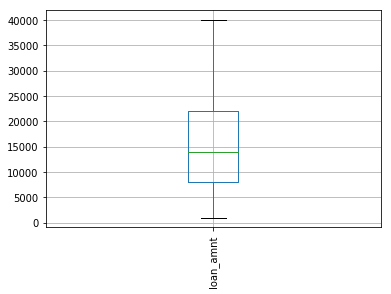

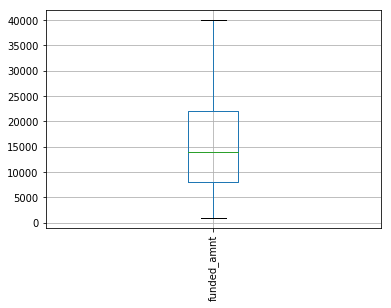

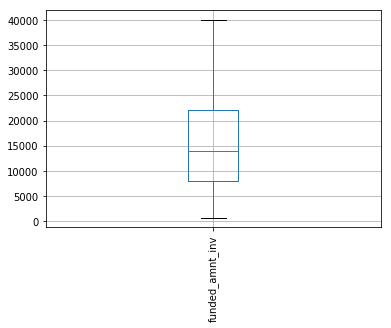

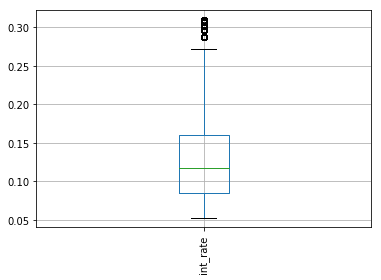

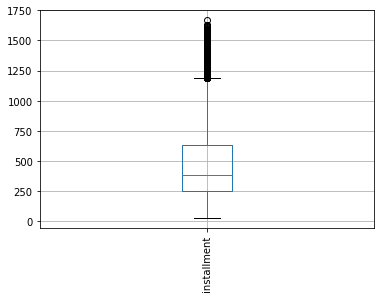

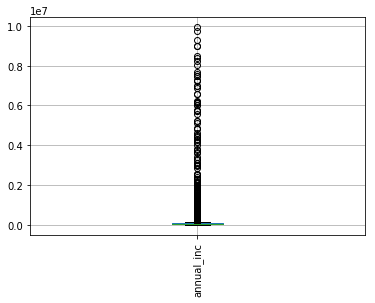

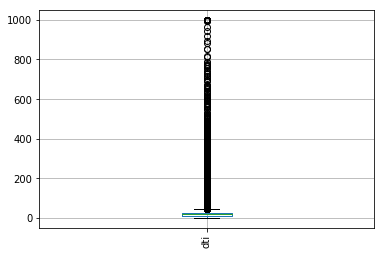

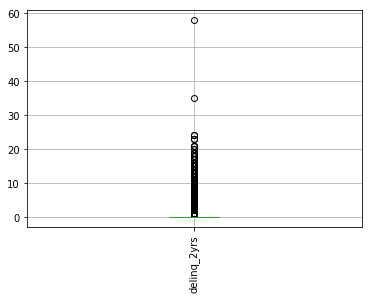

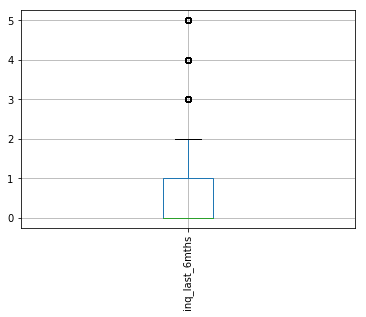

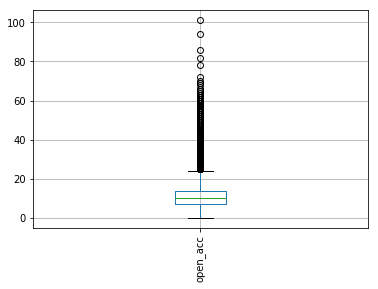

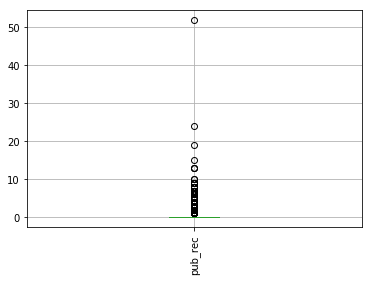

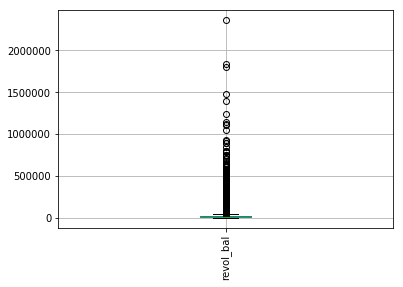

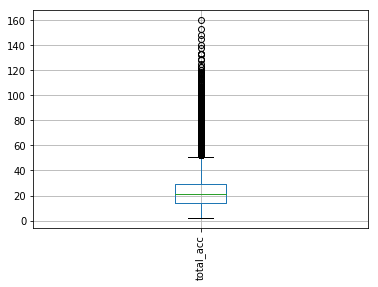

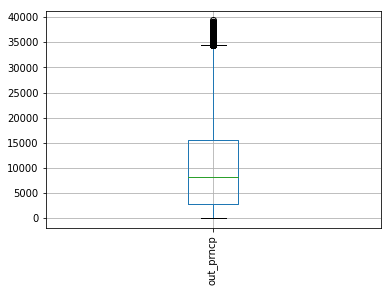

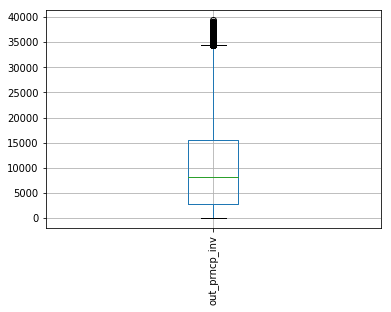

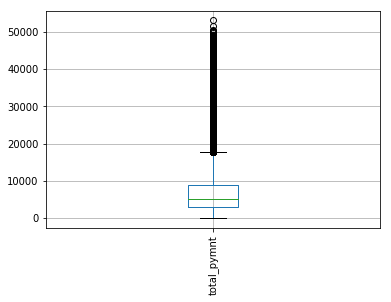

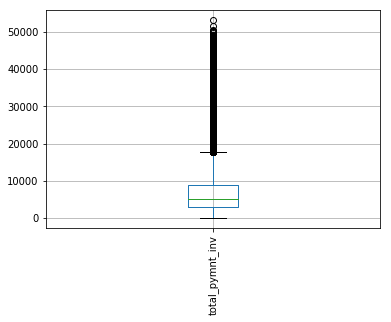

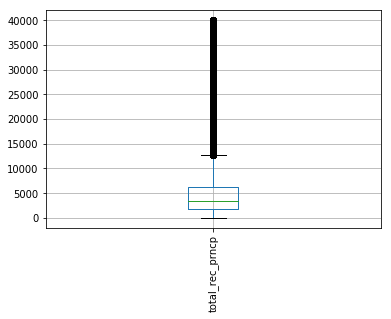

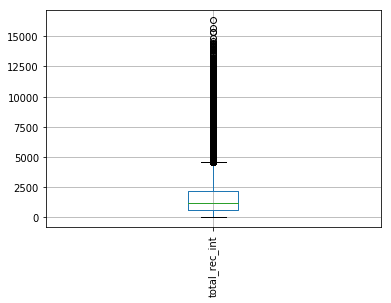

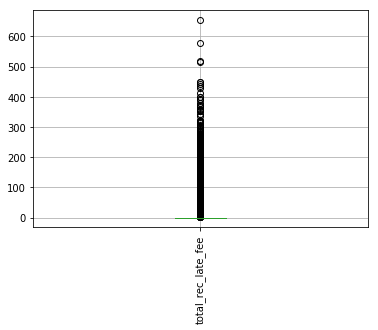

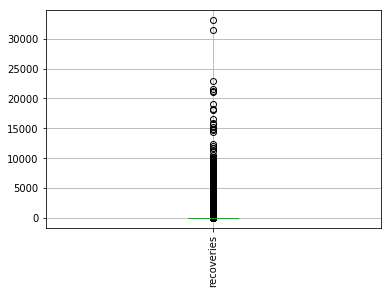

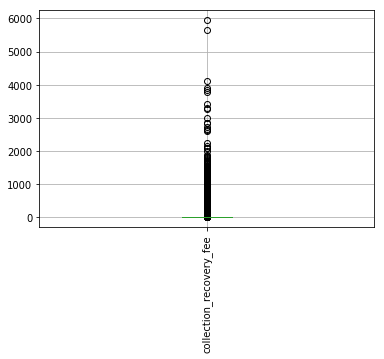

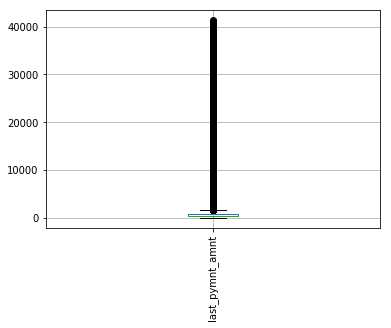

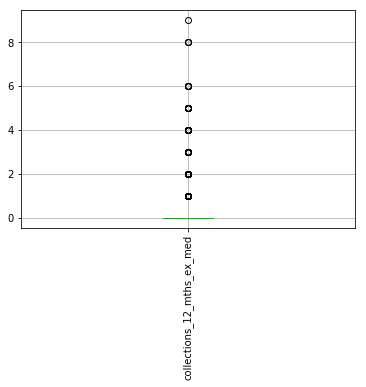

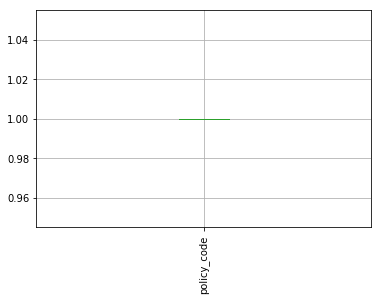

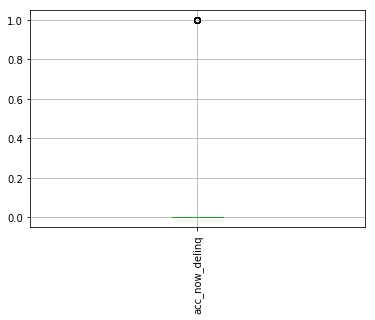

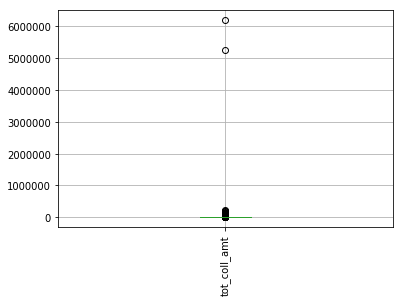

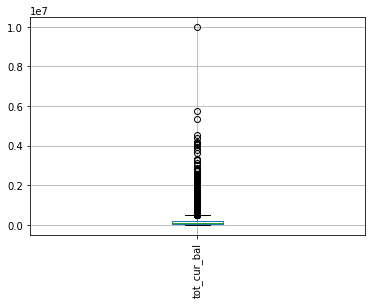

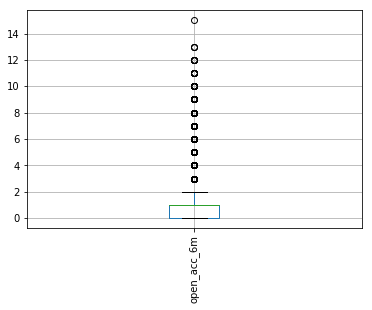

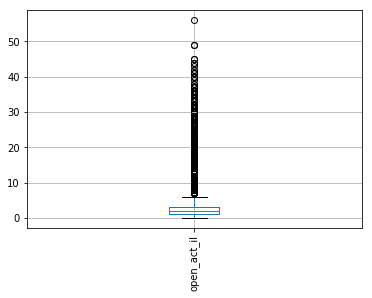

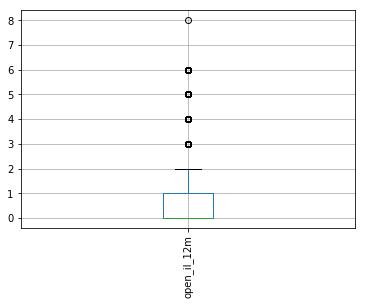

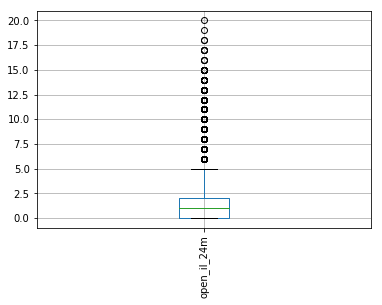

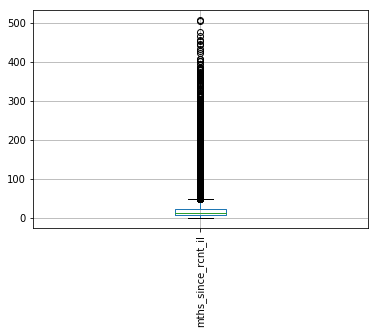

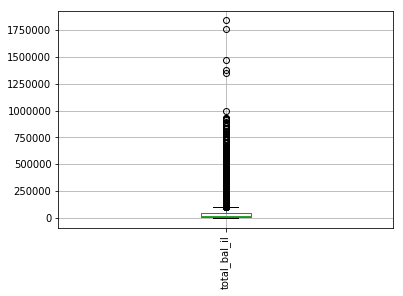

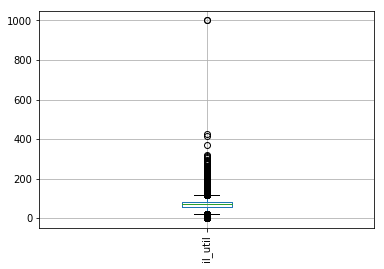

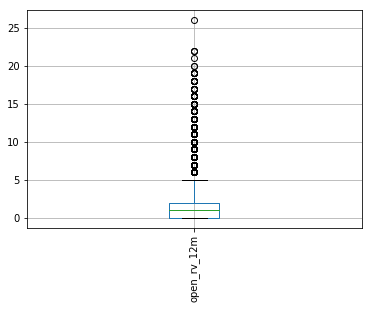

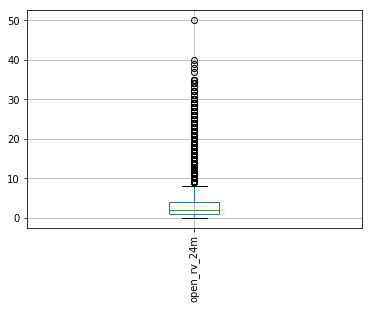

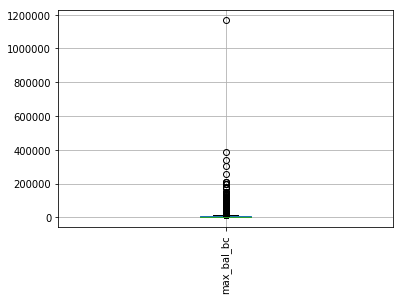

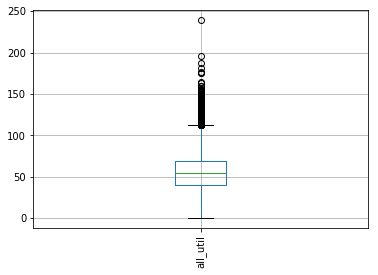

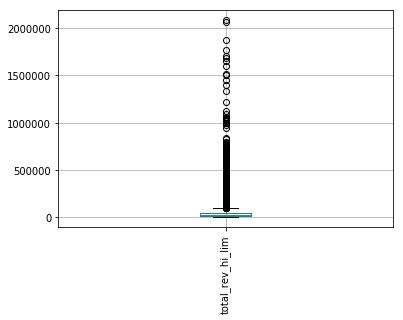

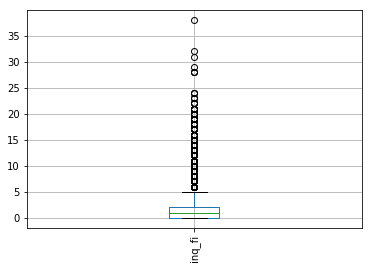

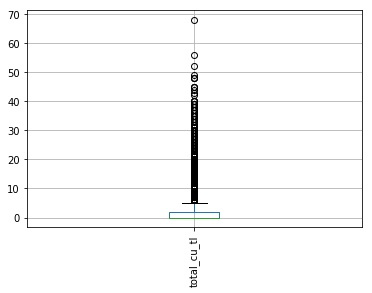

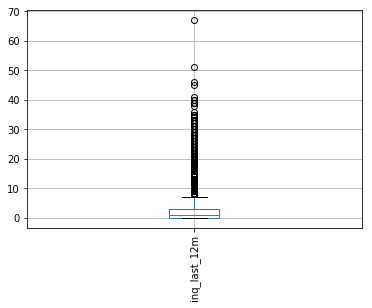

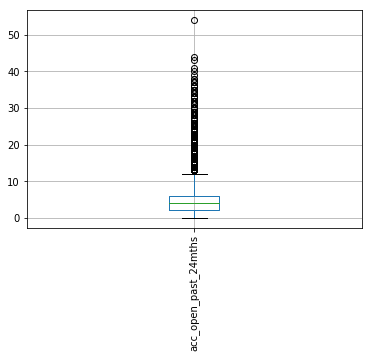

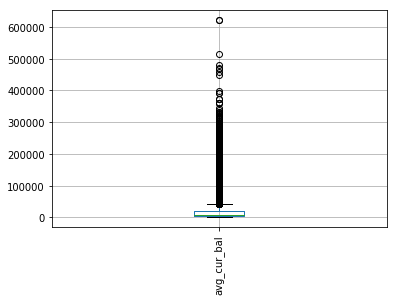

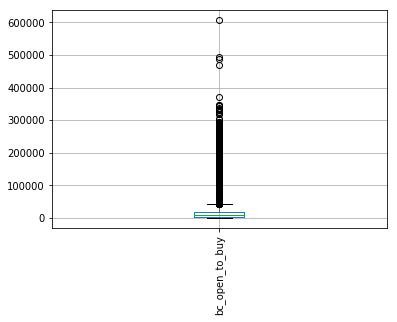

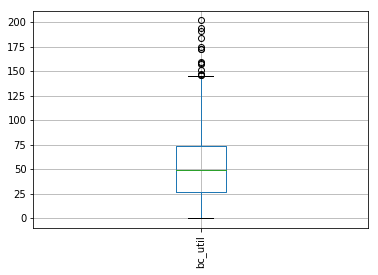

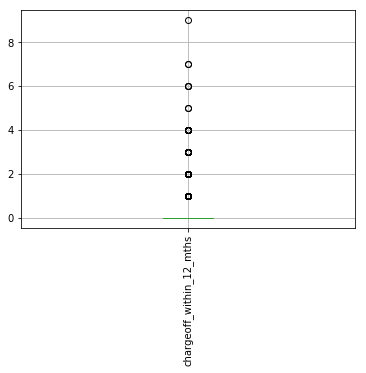

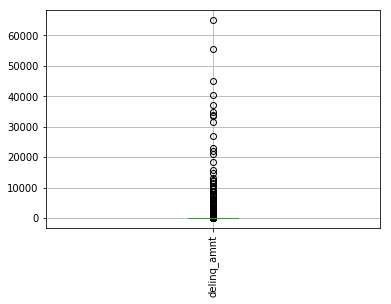

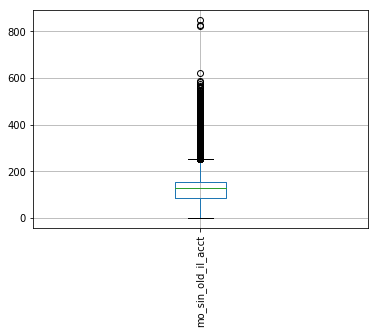

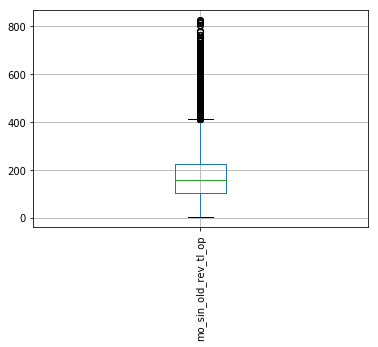

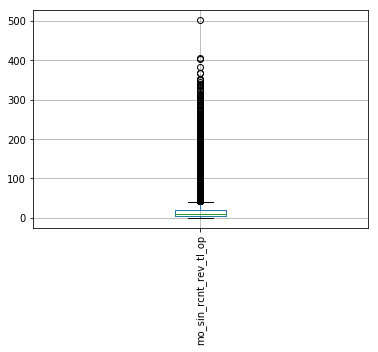

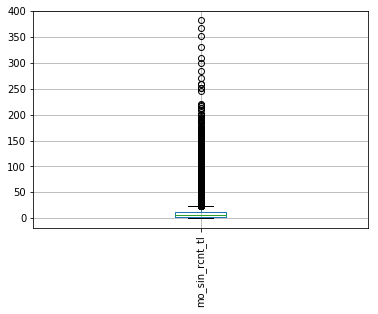

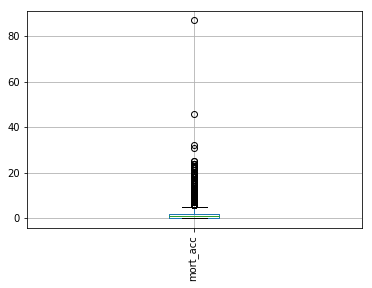

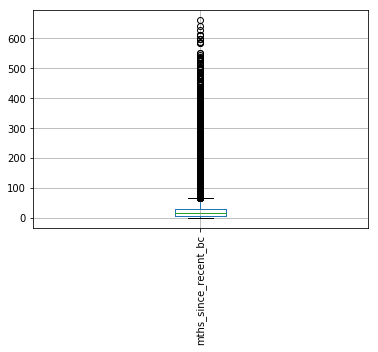

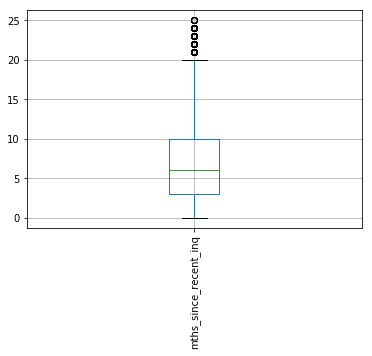

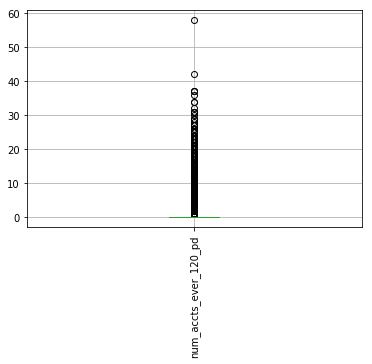

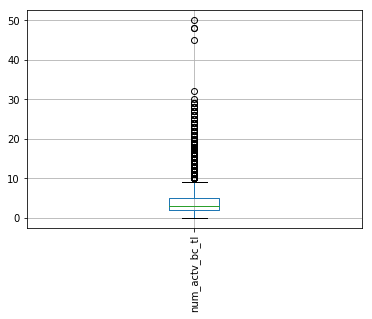

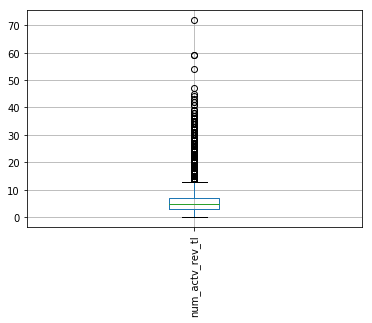

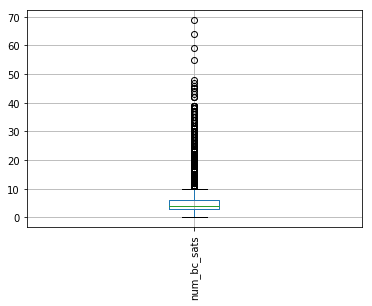

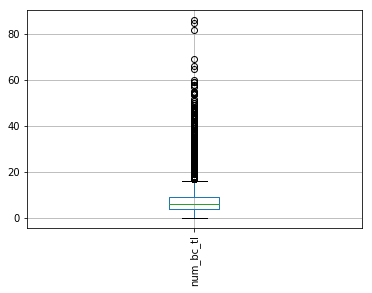

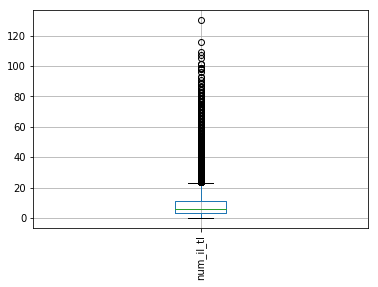

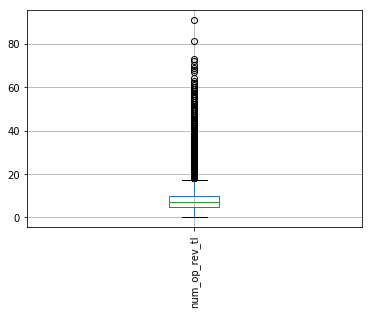

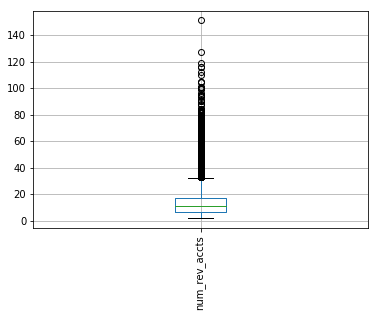

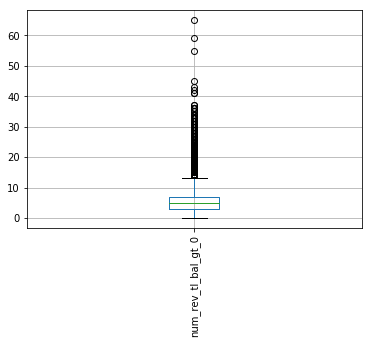

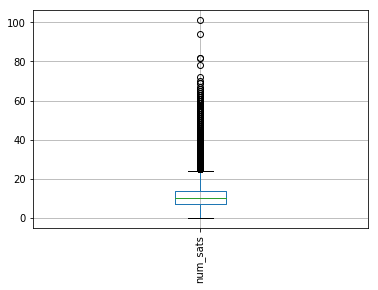

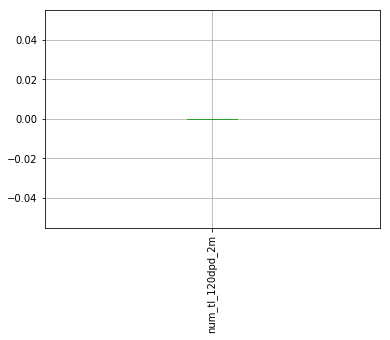

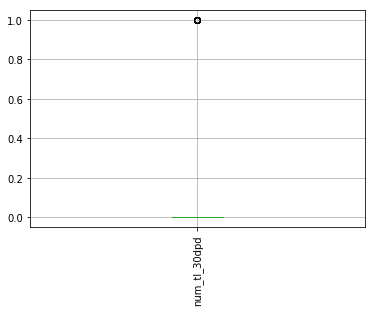

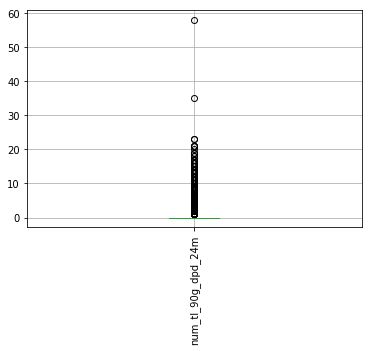

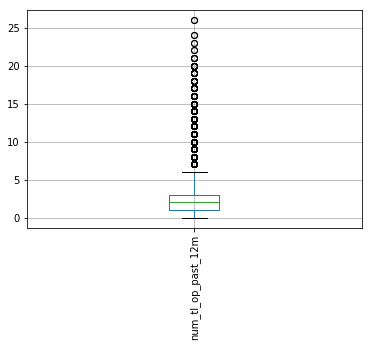

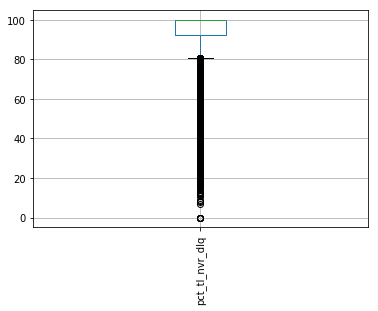

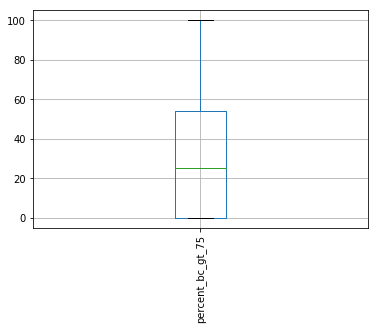

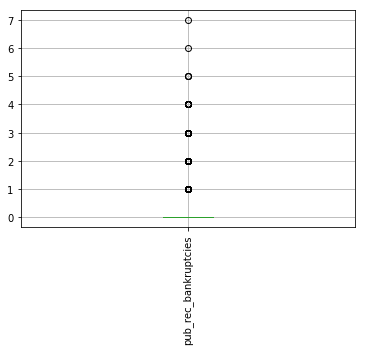

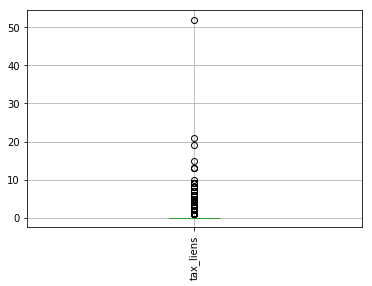

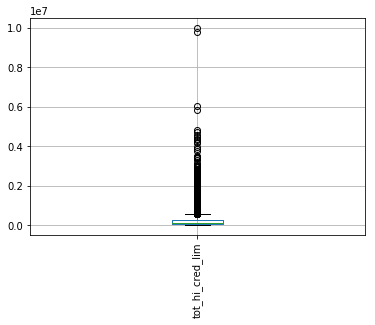

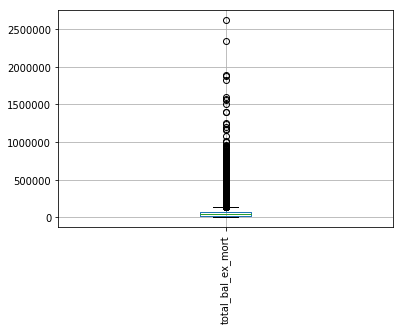

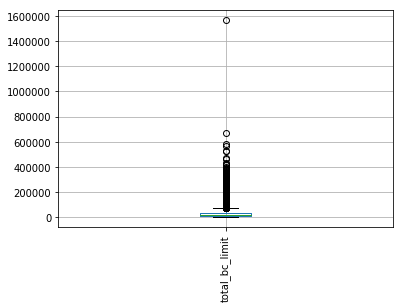

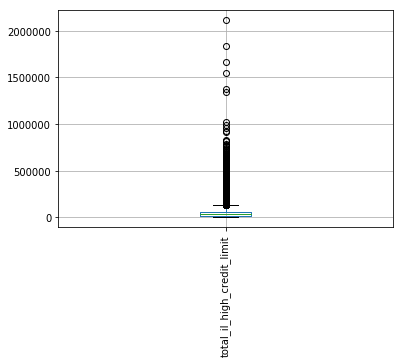

In [26]:
# show box plot of each numerical columns for detecting outliers
fig = plt.figure()

for col in list(df.select_dtypes(include=['number']).columns):
    df.boxplot(column=col)
    plt.xticks(rotation=90)
    plt.show()

### z-score

In [27]:
from scipy.stats import zscore
import numpy as np
x = np.seterr(divide='ignore', invalid='ignore')

Compute z-score for each numerical columns.
If the column contains outliers, store the column's name and the outlier records

In [28]:
outlier_cols = []     # columns that have outliers
outliers_list = []

# get number of outliers for each numerical columns
for col in num_cols:
    z_score = np.abs(zscore(df[col]))
    if len(z_score) == 0:
        continue
    
    outliers = (z_score < -3) | (z_score > 3)  # construct a Boolean Series to identify outliers
    if(df[outliers].shape[0] > 0):             # if there are outliers
        outlier_cols.append(col)               # store column's name
        outliers_list.append(df[outliers])     # store data frame that contains outliers

# combine outlier data frames and drop duplicates
outliers_df = pd.concat(outliers_list).drop_duplicates()  

In [29]:
# number of rows and columns that contain extreme values
outliers_df[outlier_cols].shape

(195492, 71)

In [30]:
df.shape

(495242, 101)

In [31]:
# list of columns that contain outliers
print(outlier_cols)

['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', '

## Step 6: Export Data

In [32]:
df.to_csv('out/loan_stats_2018_cleaned.csv', index=False)